# Decision Tree: Analysis of German Credit Data

**Decision tree: **is a decision support tool that uses a tree-like graph or model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements. Decision trees are commonly used in operations research, specifically in decision analysis, to help identify a strategy most likely to reach a goal, but are also a popular tool in machine learning.

In [1]:
import math
import numpy as np
import pandas as pd
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn-whitegrid')

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

# Get the Data

In [2]:
df = pd.read_csv('00 df.csv',sep=',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
Creditability         1000 non-null int64
Acc_Bal_bin           1000 non-null object
Pay_Status_bin        1000 non-null object
Value_SavStock_bin    1000 non-null object
Length_Emp_bin        1000 non-null object
S&M_Status_bin        1000 non-null object
No_of_Credits_bin     1000 non-null object
Co_Credits_bin        1000 non-null object
Purpose_bin           1000 non-null object
Telephone_bin         1000 non-null object
Instalment_bin        1000 non-null object
Apartment_bin         1000 non-null object
Most_Val_Asset_bin    1000 non-null object
Duration_Credit       1000 non-null int64
Credit_Amount         1000 non-null int64
Age_bin               1000 non-null object
dtypes: int64(3), object(13)
memory usage: 125.1+ KB


# DTREE - Building the Model

In [3]:
cat_feats = ['Acc_Bal_bin','Pay_Status_bin','Value_SavStock_bin','Length_Emp_bin','S&M_Status_bin','No_of_Credits_bin',
             'Co_Credits_bin','Purpose_bin','Telephone_bin','Instalment_bin','Apartment_bin','Most_Val_Asset_bin','Age_bin']
final_data = pd.get_dummies(df,columns=cat_feats,drop_first=True)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
Creditability                                  1000 non-null int64
Duration_Credit                                1000 non-null int64
Credit_Amount                                  1000 non-null int64
Acc_Bal_bin_b. no balance                      1000 non-null uint8
Acc_Bal_bin_c. some balance                    1000 non-null uint8
Pay_Status_bin_b. paid up                      1000 non-null uint8
Pay_Status_bin_c. no problem                   1000 non-null uint8
Value_SavStock_bin_b. >= 100 DM                1000 non-null uint8
Length_Emp_bin_b. [1-4) years                  1000 non-null uint8
Length_Emp_bin_c. above 4 years                1000 non-null uint8
S&M_Status_bin_b. M mar, M wid, F              1000 non-null uint8
No_of_Credits_bin_b. > 1                       1000 non-null uint8
Co_Credits_bin_b. None                         1000 non-null uint8
Purpose_bin_b. new car,

In [4]:
x = final_data.drop(['Creditability'],axis=1)
y = final_data['Creditability']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=101)

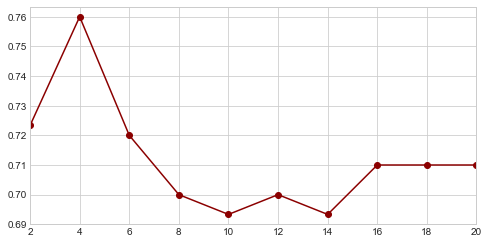

In [5]:
results = []
max_depth_options = [2,4,6,8,10,12,14,16,18,20]
for trees in max_depth_options:
    model = DecisionTreeClassifier(max_depth=trees, random_state=101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = np.mean(y_test==y_pred)
    results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, max_depth_options).plot(color="darkred",marker="o")

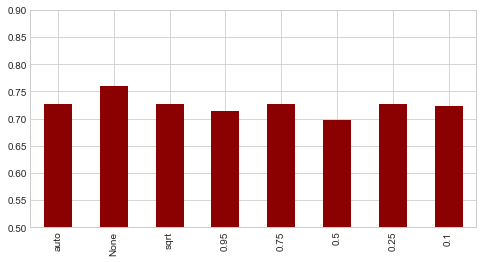

In [6]:
results = []
max_features_options = ['auto',None,'sqrt',0.95,0.75,0.5,0.25,0.10]
for trees in max_features_options:
    model = DecisionTreeClassifier(max_depth=4, random_state=101, max_features = trees)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = np.mean(y_test==y_pred)
    results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, max_features_options).plot(kind="bar",color="darkred",ylim=(0.5,0.9))

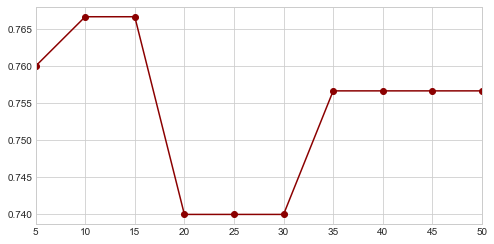

In [7]:
results = []
min_samples_leaf_options = [5,10,15,20,25,30,35,40,45,50]
for trees in min_samples_leaf_options:
    model = DecisionTreeClassifier(max_depth=4, random_state=101, max_features = None, min_samples_leaf = trees)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = np.mean(y_test==y_pred)
    results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, min_samples_leaf_options).plot(color="darkred",marker="o")

# DTREE - Predictions and Evaluation

In [8]:
dtree = DecisionTreeClassifier(max_depth=4, random_state=101, max_features = None, min_samples_leaf = 10)
dtree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=101,
            splitter='best')

In [9]:
from sklearn import tree
with open("11 tree_train.txt", "w") as f:
    f = tree.export_graphviz(dtree, out_file=f)

** http://www.webgraphviz.com/ **

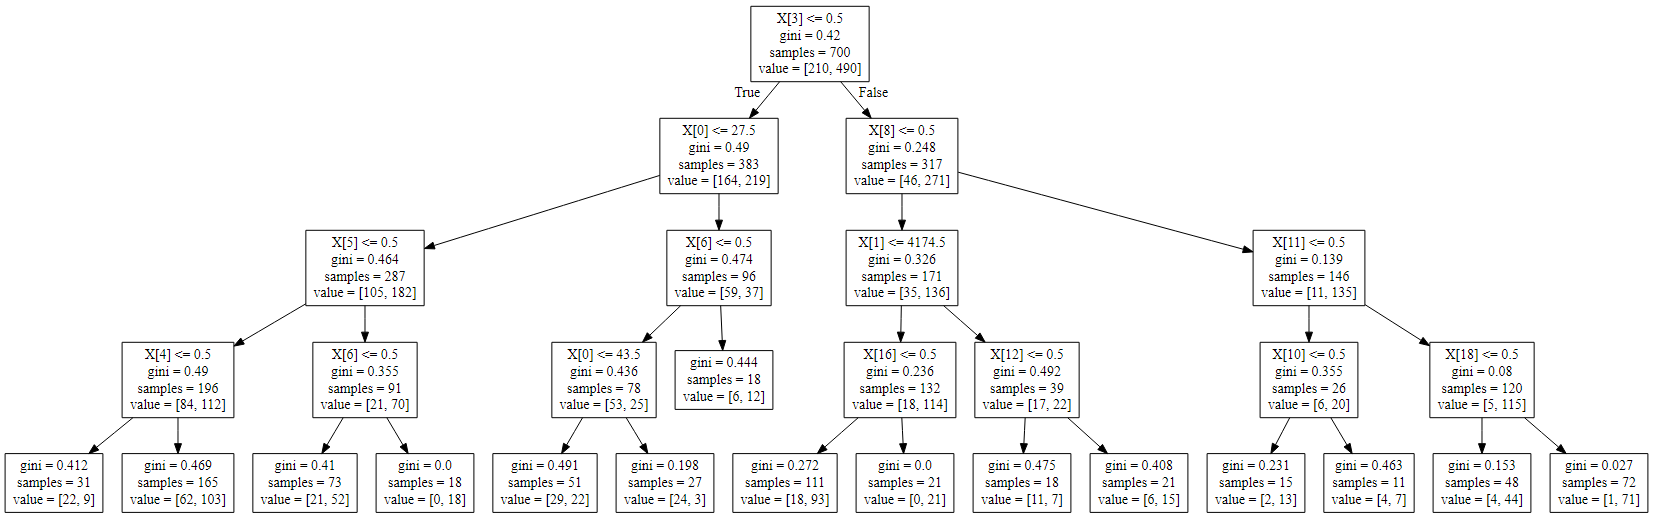

In [10]:
predicted = dtree.predict_proba(x_test)
x_test = x_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
test_calc = pd.concat([x_test,y_test,pd.DataFrame(predicted)],axis=1)
test_calc.rename(columns={1: 'predicted'}, inplace=True)

max f:  0.3
max a:  0.45


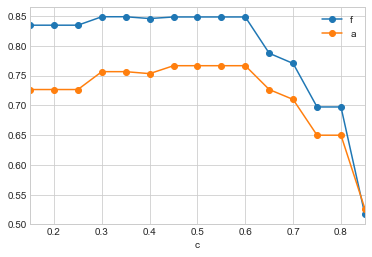

In [11]:
c = [0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85]
a = [0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85]
p = [0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85]
r = [0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85]
f = [0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85]
i = 0

for j in c:
    def flag(cols):
        x = cols[0]
        j = cols[1]
        if x > j: return 1
        else: return 0
    test_calc['j']=j
    test_calc['flag'] = test_calc[['predicted','j']].apply(flag,axis=1)
    df_table = confusion_matrix(test_calc['Creditability'],test_calc['flag'])
    a[i] = (df_table[0,0] + df_table[1,1]) / (df_table[0,0] + df_table[0,1] + df_table[1,0] + df_table[1,1])
    p[i] = df_table[1,1] / (df_table[1,1] + df_table[0,1])
    r[i] = df_table[1,1] / (df_table[1,1] + df_table[1,0])
    f[i] = (2 * p[i] * r[i]) / (p[i] + r[i])
    i = i+1

df_decision = pd.concat([pd.DataFrame(c),pd.DataFrame(a),pd.DataFrame(p),pd.DataFrame(r),pd.DataFrame(f)],axis=1)
df_decision.columns = ['c','a','p','r','f']

f_max = df_decision[df_decision['f']==df_decision['f'].max()].head(1)
max_f = float(f_max['c'])
a_max = df_decision[df_decision['a']==df_decision['a'].max()].head(1)
max_a = float(a_max['c'])

df_decision.plot(x='c',y=['f','a'],marker="o")

print ("max f: ",max_f)
print ("max a: ",max_a)

In [12]:
y_pred = dtree.predict_proba(x_test)
test_calc = pd.concat([pd.DataFrame(y_test),pd.DataFrame(y_pred)],axis=1)
test_calc.rename(columns={1: 'predicted'}, inplace=True)
test_calc['predicted'] = test_calc['predicted'].apply(lambda x: 1 if x > 0.45 else 0)

print('\033[1m' + '\033[4m' + 'accuracy' + '\033[0m')
print(round(np.mean(test_calc['Creditability']==test_calc['predicted'])*100,2),"%")
print('\n')
print('\033[1m' + '\033[4m' + 'classification_report' + '\033[0m')
print(classification_report(test_calc['Creditability'],test_calc['predicted']))
print('\n')
print('\033[1m' + '\033[4m' + 'confusion_matrix' + '\033[0m')
print(confusion_matrix(test_calc['Creditability'],test_calc['predicted']))

accuracy
76.67 %


classification_report
             precision    recall  f1-score   support

          0       0.71      0.38      0.49        90
          1       0.78      0.93      0.85       210

avg / total       0.76      0.77      0.74       300



confusion_matrix
[[ 34  56]
 [ 14 196]]


# Cost-Profit Consideration

###### Ultimately these statistical decisions must be translated into profit consideration for the bank. Let us assume that a correct decision of the bank would result in 35% profit at the end of 5 years. A correct decision here means that the bank predicts an application to be good or credit-worthy and it actually turns out to be credit worthy. When the opposite is true, i.e. bank predicts the application to be good but it turns out to be bad credit, then the loss is 100%. If the bank predicts an application to be non-creditworthy, then loan facility is not extended to that applicant and bank does not incur any loss (opportunity loss is not considered here). The cost matrix, therefore, is as follows:

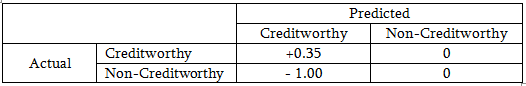

In [13]:
df_table = confusion_matrix(test_calc['Creditability'],test_calc['predicted'])
anc_pnc = df_table[0,0]
anc_pc = df_table[0,1]
ac_pnc = df_table[1,0]
ac_pc = df_table[1,1]

print("profit: ",(-1 * anc_pc + 0.35 * ac_pc))

profit:  12.6
